<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D(CNN)_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


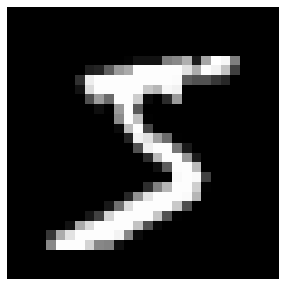

In [22]:
import matplotlib.pyplot as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train, 0)

In [23]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

#정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255
0.0 1.0
0.0 1.0


In [28]:
#채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [35]:
x_train_in_1 = x_train[:, tf.newaxis]
x_train_in_2 = x_train[:, :, tf.newaxis]
x_train_in_3 = x_train[:, tf.newaxis, :]
print(x_train_in_1.shape, x_train_in_2.shape, x_train_in_3.shape)

(60000, 1, 28, 28) (60000, 28, 1, 28) (60000, 1, 28, 28)


In [29]:
#Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
        #Convolution 적용 (32 filters)
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
        #Max Pooling 적용
        tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
        #Classifier 출력층
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax'),
])

In [30]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2039 - accuracy: 0.9416 - val_loss: 0.0851 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0754 - accuracy: 0.9784 - val_loss: 0.0664 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0621 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0607 - val_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0397 - accuracy: 0.9883 - val_loss: 0.0568 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0528 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0550 -

In [31]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0542 - accuracy: 0.9824


[0.05424301698803902, 0.9824000000953674]

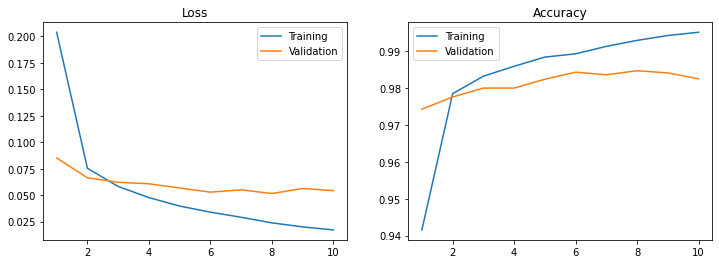

In [34]:
def plot_loss_acc(histroy, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    gif, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch+1), loss, label='Training')
    axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch+1), acc, label='Training')
    axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

2-3 모델 구조 파악

In [36]:
#모델 구조
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [37]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [38]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>

In [39]:
#레이어
model.layers

In [40]:
#첫 번째 레이어 선택
model.layers[0]

In [41]:
#첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [42]:
#첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [43]:
#첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.354328  ,  0.691378  ,  0.10763633, -0.11561609,
           -0.08019651,  0.14052753, -0.00273624, -0.14448969,
           -1.0684319 ,  0.22576712, -0.5363146 , -0.07433175,
           -0.9528989 ,  0.23889725, -0.4251865 ,  0.1164681 ,
           -0.33020335, -0.18705803,  0.4356625 ,  0.12933387,
            0.29839045,  0.15902224,  0.26132736,  0.2178766 ,
            0.29237115,  0.14413965, -0.6783183 ,  0.27823856,
            0.14762117, -1.4077867 ,  0.44939968, -1.5006274 ]],
 
         [[-0.80531555, -0.45731124,  0.4641552 , -0.43169045,
           -0.06609291,  0.3564265 ,  0.33141938, -0.56460226,
           -0.5329202 ,  0.17893474,  0.1310375 , -0.33358616,
           -0.23984222,  0.19054157,  0.41414076, -0.31398332,
            0.14825577,  0.27225453,  0.51640946, -0.69468373,
            0.14369962,  0.1015903 , -0.36984754,  0.28566715,
            0.21850547,  0.0688825 , -0.39

In [44]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [47]:
#샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

2

In [48]:
#첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

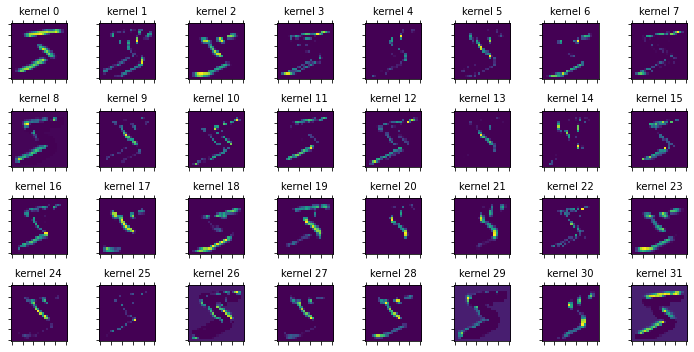

In [50]:
#Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [52]:
#두 번째 레이어(pool) 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


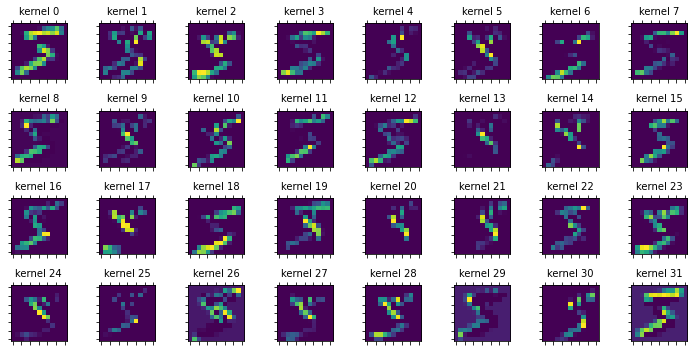

In [54]:
#시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap = 'viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

#3. 복잡한 모델 생성

##3-1 데이터셋 준비 

In [56]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_trian), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [57]:
#새로운 출력 값 배열 생성(홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y%2==0:  y_train_odd.append(0)
    else:       y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [58]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [59]:
#Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y%2==0:  y_valid_odd.append(0)
    else:       y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [60]:
#정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

#채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


##3-2 functional API로 다중 입력, 다중 출력 레이어 생성

In [63]:
#Functional API를 사용하여 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs, outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_3[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 5408)         0           ['max_pooling2d_1[0][0]']        
                                                                                            

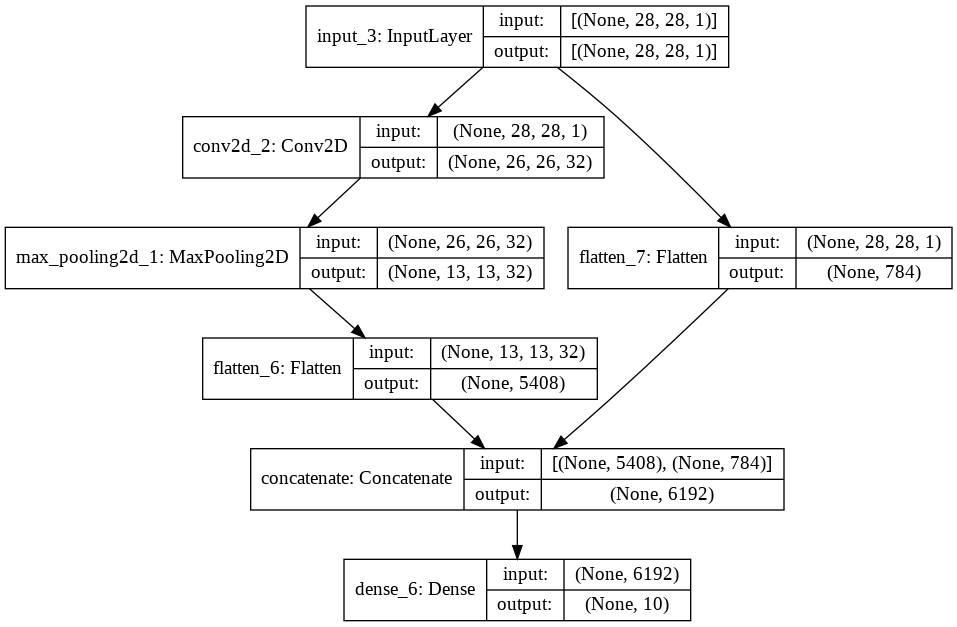

In [65]:
#모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [67]:
#모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

#모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2083 - accuracy: 0.9404 - val_loss: 0.0876 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0785 - accuracy: 0.9772 - val_loss: 0.0709 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0599 - accuracy: 0.9821 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0411 - accuracy: 0.9876 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0551 -

##3-3 다중 출력 분류 모델

In [69]:
#Functional API를 사용해 모델 생성
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2D_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2D_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2D_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [70]:
#모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


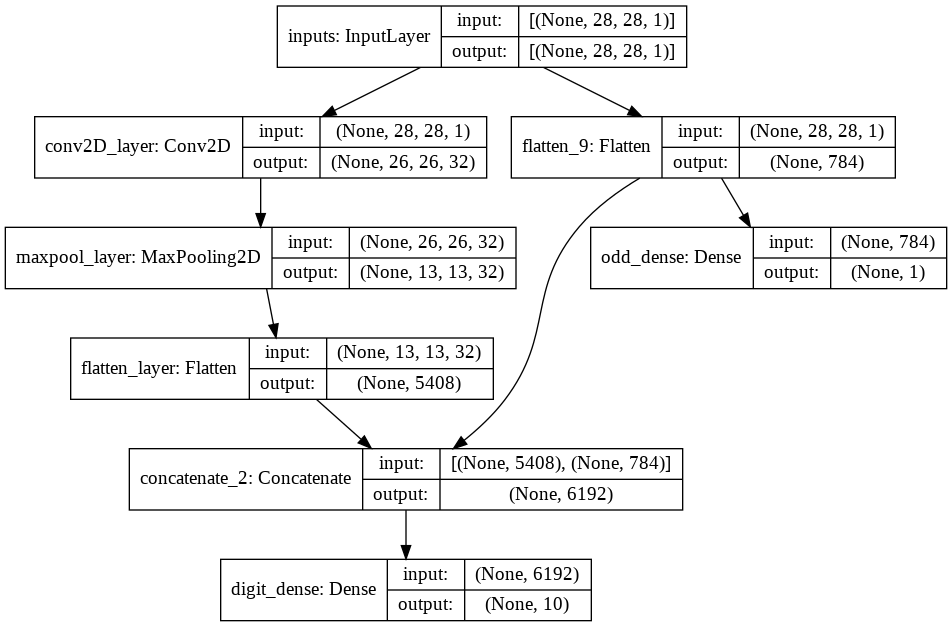

In [71]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [73]:
#모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5},
              #loss = 1.0 *sparse_categorical_crossentropy+0.5 * binary_crossentropy
              metrics=['accuracy'])
#모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd}, 
                    validation_data=({'inputs':x_valid_in}, {'digit_dense': y_valid, 'odd_dense':y_valid_odd}), 
                    epochs=10)


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3658 - digit_dense_loss: 0.2043 - odd_dense_loss: 0.3229 - digit_dense_accuracy: 0.9427 - odd_dense_accuracy: 0.8658 - val_loss: 0.2303 - val_digit_dense_loss: 0.0927 - val_odd_dense_loss: 0.2753 - val_digit_dense_accuracy: 0.9693 - val_odd_dense_accuracy: 0.8886
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2155 - digit_dense_loss: 0.0798 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9772 - odd_dense_accuracy: 0.8906 - val_loss: 0.2088 - val_digit_dense_loss: 0.0762 - val_odd_dense_loss: 0.2652 - val_digit_dense_accuracy: 0.9765 - val_odd_dense_accuracy: 0.8966
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1921 - digit_dense_loss: 0.0607 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8960 - val_loss: 0.1960 - val_digit_dense_loss: 0.0630 - val_odd_dense_loss: 0.2661 - val_digit_dense_accuracy: 0.9802 -

In [76]:
#모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 8ms/step - loss: 0.1924 - digit_dense_loss: 0.0640 - odd_dense_loss: 0.2569 - digit_dense_accuracy: 0.9828 - odd_dense_accuracy: 0.9005


[0.19242626428604126,
 0.06396369636058807,
 0.25692498683929443,
 0.9828000068664551,
 0.9004999995231628]

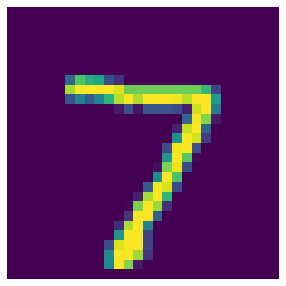

In [77]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis('off')
    plt.show()

plot_image(x_valid, 0)

In [78]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[7.7130264e-12 7.2748890e-10 6.6032784e-09 3.9396977e-07 6.5130575e-12
 2.4038624e-11 3.5547499e-20 9.9999952e-01 4.0453982e-09 7.3014618e-08]
[0.99963915]


In [79]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [82]:
odd_labels = (odd_preds >0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

##3-4 전이 학습(transfer learning)

In [100]:
#앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

#앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(model.input, base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


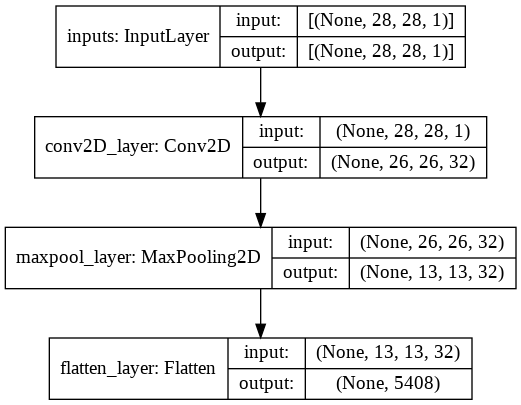

In [101]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [116]:
#Sequentail API 적용
digit_model = tf.keras.Sequential([
                                   base_model, 
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_16 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_________________________________________________________________


In [117]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

AssertionError: ignored

In [105]:
#모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model.fit(x_train_in, y_trian, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1321 - accuracy: 0.9621 - val_loss: 0.0638 - val_accuracy: 0.9797
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0483 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0530 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0520 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0577 -

In [107]:
#베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [109]:
#Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(base_model_frozen.input, dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [111]:
#모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1160 - accuracy: 0.9690 - val_loss: 0.0659 - val_accuracy: 0.9778
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0487 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0519 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0557 - val_ac

In [113]:
#베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(model.input, base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2D_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [119]:
#Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(base_model_frozen2.input, dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2D_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [121]:
#모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data = (x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1186 - accuracy: 0.9683 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0483 - val_accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0491 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0553 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0556 - val_ac